<a href="https://colab.research.google.com/github/PapaJacque16/MLA_AMM/blob/main/MLA3_AMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Machine Learning Assignment 3
###Aaron McCarley
###CS430-ON
###Machine Learning in the Cloud

###Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Imports for specific models
Include imports for both SVC and SVR

In [3]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

###Imports for buiding transformers, the pipleine, and splitting data

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

###Import performance measures to evaluate the model

In [5]:
from sklearn.metrics import confusion_matrix as plot_cm
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression

###Set config option to display the pipeline diagram

In [6]:
from sklearn import set_config
set_config(display='diagram')

###SVC Classification - Acquire Data

In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [8]:
df

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   forgery   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


###Statistics and Visual Exploration
Summarize the numerical columns of data.

In [10]:
df.describe(include=['float64', 'int64'])

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


###Get the counts of forgery vs no forgery. Save this into a data frame so you can plot it.

In [11]:
gc = df['forgery'].value_counts()
gc

0    762
1    610
Name: forgery, dtype: int64

In [12]:
df2 = pd.DataFrame(gc)

###Create a barplot to view how many banknotes are forgeries and how many are not. The size of the plot should 10 x 5.

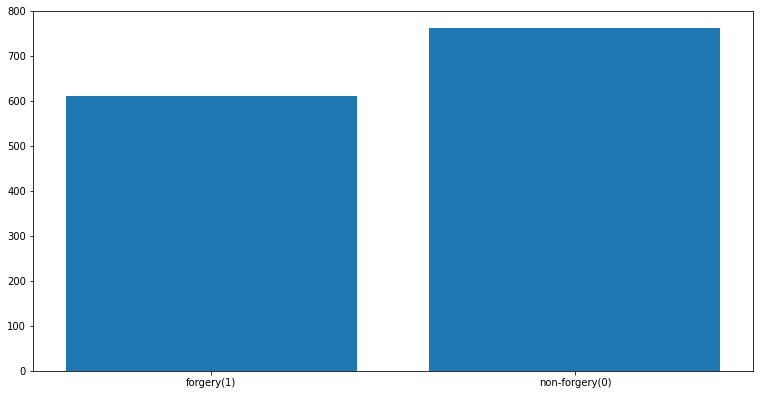

In [13]:
fig = plt.figure(figsize=(10,5));
ax = fig.add_axes([0,0,1,1])
Forgeries = ['forgery(1)', 'non-forgery(0)']
Counts = [610,762]
ax.bar(Forgeries,Counts)
plt.show()


###Create a pairplot of all of the numerical variables using Seaborn.

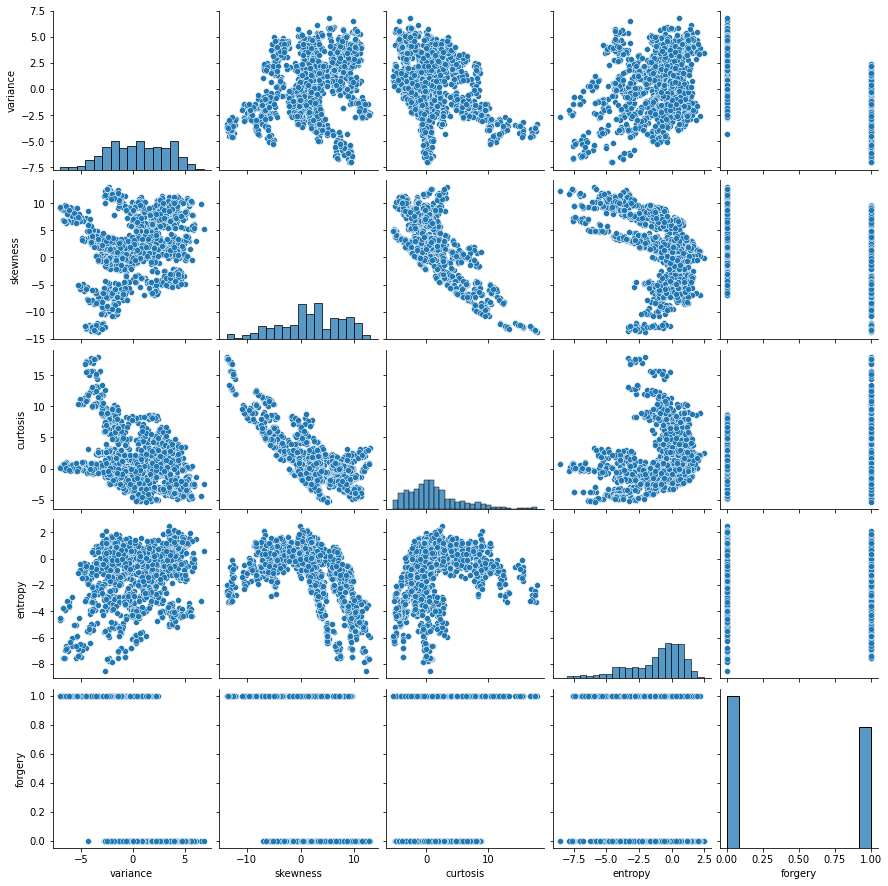

In [14]:
sns.pairplot(df);

###In a Markdown comment - write up any interesting patterns you see from the pairplot.

Under forgery the variance, skewness, curtosis, and entropy charts all had similar patterns as they were had either 1s or 0s, but had different measurements of where each number fell throughout the 1372 rows.  

###Splitting Data into Train/Test
###Create a data frame called X of your inputs that includes all columns except date and forgery.

###Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.

In [15]:
X =  df[['variance',	'skewness',	'curtosis',	'entropy']]
y = df['forgery']

###Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

###Building the Pipeline
###Create a column transformer that will MinMax scale the numerical variables 

In [17]:
num_attribs = ['variance',	'skewness',	'curtosis',	'entropy']

In [18]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)])

###Create a pipeline that will transform the data and then run a SVC Classification using the linear kernel.

In [19]:
pipeline = Pipeline([('trans', col_transform),('SVCLinear', LinearSVC(C=1, max_iter=100000)),])
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('SVCLinear', LinearSVC(C=1, max_iter=100000))])

###Executing the Model
###Run the pipeline to fit the SVC Classification model.

In [20]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('SVCLinear', LinearSVC(C=1, max_iter=100000))])

###Evaluating the Model
###Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [21]:
y_pred = pipeline.predict(X_test)

###Call the plot_cm function to generate the confusion matrix.

In [22]:
plot_cm(y_test,y_pred)

array([[154,   3],
       [  0, 118]])

###Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

In [23]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9752066115702479
1.0
0.9874476987447699


###Conclusion
###In a Markdown comment, write a conclusion on how suitable you think this model is for predicting with or not a banknote is a forgery.

The precision score, the recall score and the F1 score are all very similar for the level of accuracy or the predictions, which this case are very high and very accurate.

###Load the Steel_industry_data.csv into a data frame named df.
###Rename the columns according to Table 1: Columns Names.

In [24]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [25]:
df.rename(columns={'Usage_kWH':'usage_kwh','Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh', 'Lagging_Current_Power_Factor':'lag_current_pwr', 'Leading_Current_Power_Factor':'lead_current_pwr', 'NSM':'nsm', 'WeekStatus':'week_status', 'Day_of_week':'day_of_week', 'Load_Type':'load_type'},inplace=True)
df

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [26]:
df.dtypes

date                     object
usage_kwh               float64
lag_react_pwr_kvarh     float64
lead_react_pwr_kvarh    float64
CO2(tCO2)               float64
lag_current_pwr         float64
lead_current_pwr        float64
nsm                       int64
week_status              object
day_of_week              object
load_type                object
dtype: object

###Splitting Data into Train/Test
###Create a data frame called X of your inputs that includes all columns except date and usage_kwh.



###Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.

In [27]:
X =  df[['lag_react_pwr_kvarh','lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm']]
y = df['usage_kwh']

###Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

###Building the Pipeline
###Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).

In [29]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh']
cat_attribs = ['lag_current_pwr', 'lead_current_pwr', 'nsm']

In [57]:
col_transform = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_attribs),('num', MinMaxScaler(), num_attribs)])

###Create a pipeline that will transform the data and then run an Support Vector Machine Regression.

In [67]:
pipeline = Pipeline([('trans', col_transform), ('SVR', LinearSVR(C=1, max_iter=100000)),])

###Executing the Model
###Run the pipeline to fit the Support Vector Machine Regression.

In [68]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh'])])),
                ('SVR', LinearSVR(C=1, max_iter=100000))])

In [75]:
pipeline.fit(X_test, np.ravel(y_test))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh'])])),
                ('SVR', LinearSVR(C=1, max_iter=100000))])

###Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [76]:
y_pred = pipeline.predict(X_test)

###Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.

In [71]:
y_train_pred = pipeline.predict(X_train)

In [78]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_pred)**(0.5))

9.175626846668122
10.141317116233061


###In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.

I think the the model is fairly suitable based simialr comaprison between the test and training data results. 